<a href="https://colab.research.google.com/github/ShreyaDhar2/NN/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255

In [7]:
len(X_valid)

5000

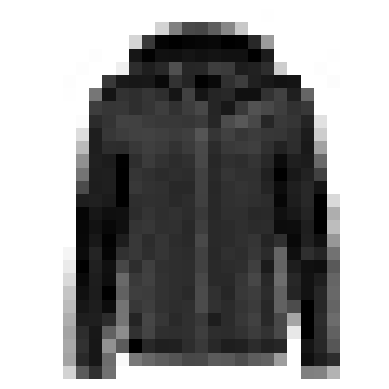

In [8]:
plt.imshow(X_train[0], cmap = "binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
len(y_train)

55000

In [11]:
y_train[0]


np.uint8(4)

In [12]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress",
               "Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

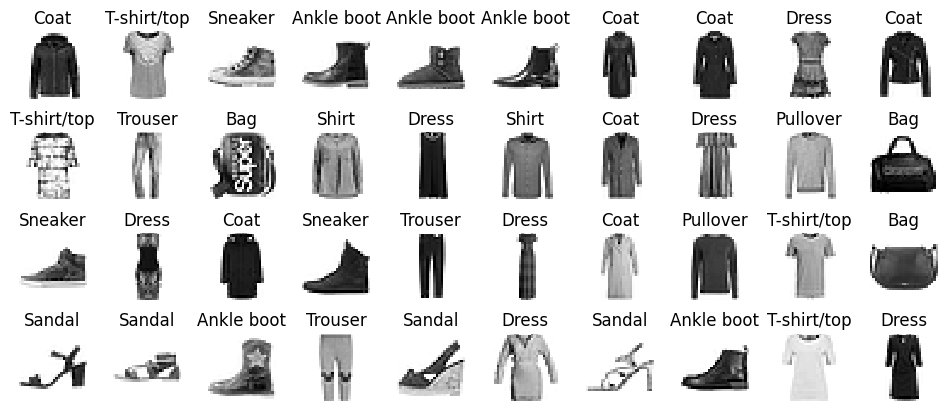

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols *1.2,n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols*row + col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(X_train[index],cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]],fontsize =12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

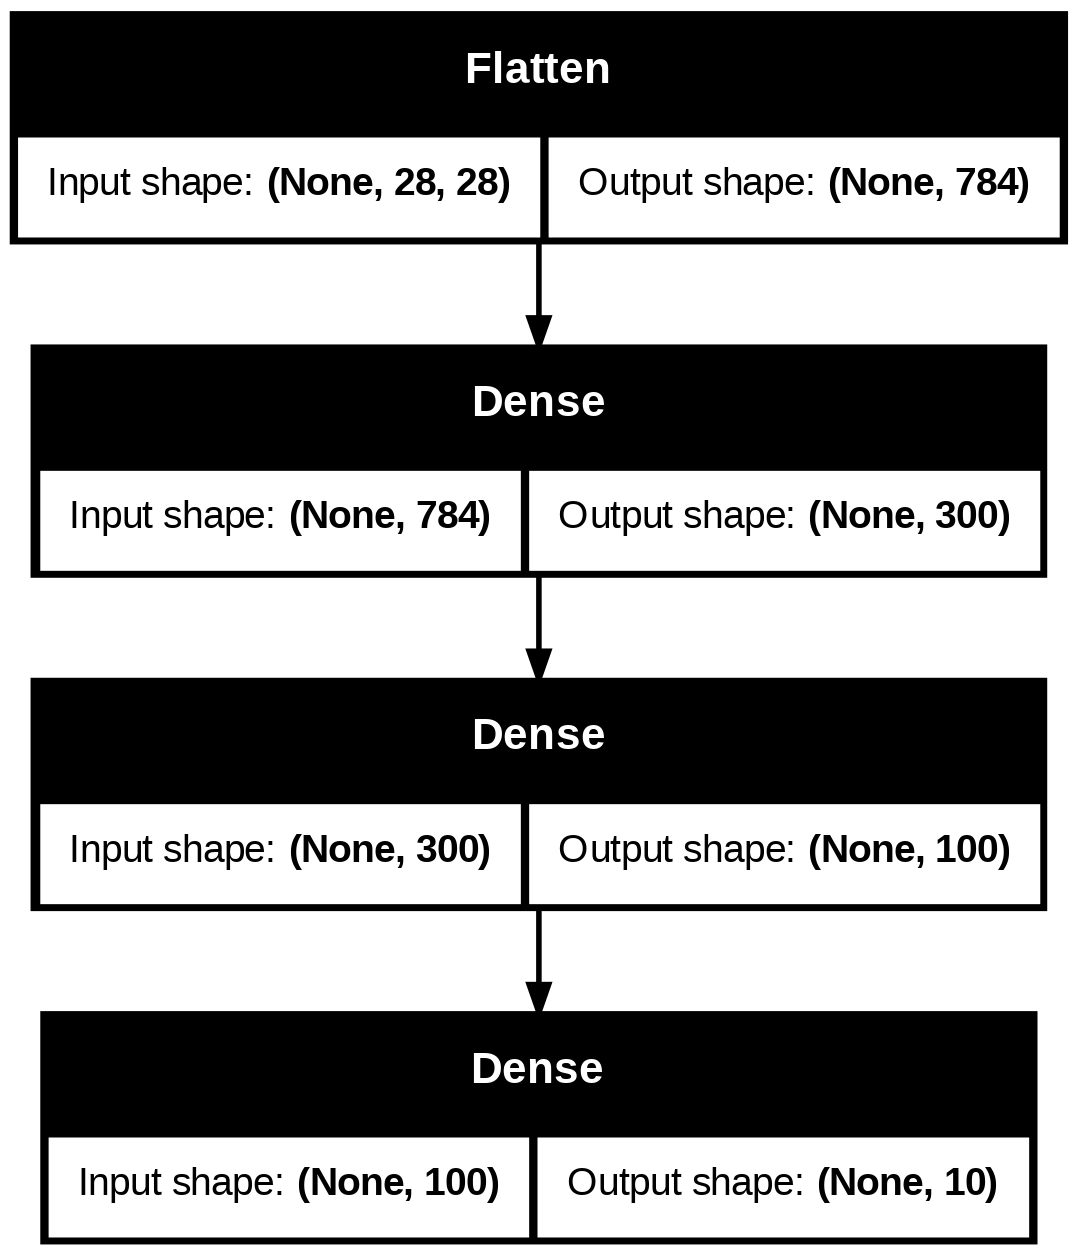

In [21]:
keras.utils.plot_model(model,"my_fashion_mnist_model.png",show_shapes=True)

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1


True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.05869163, -0.03248502,  0.06380099, ..., -0.01673946,
        -0.01296948,  0.02236593],
       [-0.06770798, -0.05806861, -0.02185218, ..., -0.02388489,
        -0.02195865,  0.04051049],
       [-0.05446433,  0.01436856,  0.06451496, ...,  0.01355653,
         0.06642318,  0.03294814],
       ...,
       [ 0.03689676,  0.01199352, -0.06132414, ...,  0.06954257,
        -0.03299617, -0.00718999],
       [-0.04612514, -0.05885897, -0.05484211, ...,  0.07068776,
        -0.06834379, -0.02958851],
       [-0.05277501,  0.03761294,  0.06924358, ..., -0.02343841,
        -0.01623544, -0.02467128]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
               optimizer ="sgd",
               metrics =["accuracy"] )

In [30]:
history = model.fit(X_train,y_train,epochs = 10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6924 - loss: 0.9612 - val_accuracy: 0.8222 - val_loss: 0.5192
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8257 - loss: 0.4969 - val_accuracy: 0.8450 - val_loss: 0.4561
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8420 - loss: 0.4464 - val_accuracy: 0.8550 - val_loss: 0.4248
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8536 - loss: 0.4180 - val_accuracy: 0.8596 - val_loss: 0.4058
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8596 - loss: 0.3979 - val_accuracy: 0.8644 - val_loss: 0.3915
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8648 - loss: 0.3814 - val_accuracy: 0.8678 - val_loss: 0.3782
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8693 - loss: 0.3676 - val_accuracy: 0.8724 - val_loss: 0.3685
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8731 - loss: 0.3555 - 

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
               optimizer ="adam",
               metrics =["accuracy"] )

In [32]:
history = model.fit(X_train,y_train,epochs = 10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8415 - loss: 0.4424 - val_accuracy: 0.8770 - val_loss: 0.3441
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8696 - loss: 0.3580 - val_accuracy: 0.8832 - val_loss: 0.3287
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8803 - loss: 0.3264 - val_accuracy: 0.8752 - val_loss: 0.3350
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8862 - loss: 0.3031 - val_accuracy: 0.8860 - val_loss: 0.3224
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8937 - loss: 0.2826 - val_accuracy: 0.8876 - val_loss: 0.3287
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8996 - loss: 0.2682 - val_accuracy: 0.8894 - val_loss: 0.3178
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9071 - loss: 0.2531 - val_accuracy: 0.8926 - val_loss: 0.3078
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9097 - loss: 0.2413 -

In [33]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

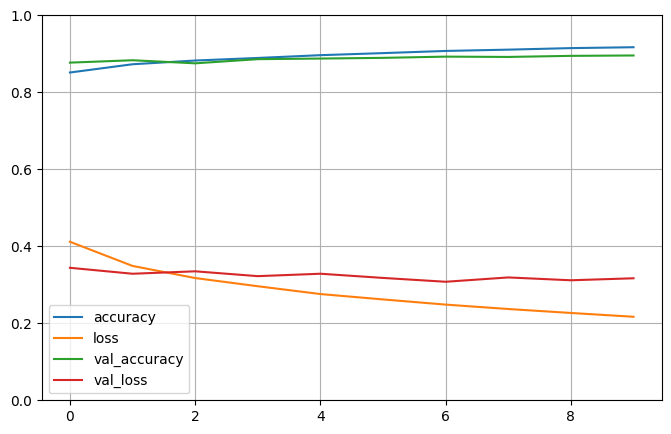

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8800 - loss: 0.3620


[0.35734084248542786, 0.8835999965667725]

TESTING

In [38]:
X_new = X_test[:3]

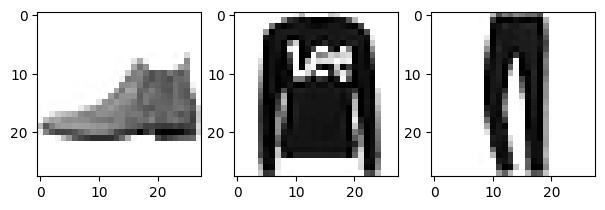

In [39]:
plt.figure(figsize=(7.2,2.4))
for index, image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image,cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [40]:
y_pred = np.argmax(model.predict(X_new),axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([9, 2, 1])

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')